In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

In [2]:
sympy.init_printing()

# Direction Fields

It is the slope of the unknown function on a grid in the x-y plane. The slope of
$y(x)$ at arbitrary points of the x-y plane is given by the definition of the 
ODE: $\frac{d y(x)}{d x}=f(x, y(x))$. So we only need to iterate over the x and 
y values on the coordinate grid and evaluate $f(x, y(x))$ to know the slope of 
$y(x)$ at that point.

The function below produces the direction field graphs for the ODEs of form
$\frac{d y(x)}{d x}=f(x, y(x))$.

In [3]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))
    
    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]
    
    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],[yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
        ax.axis('tight')
        ax.set_title(r"$%s$" %
                     (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),fontsize=18)
    return ax

In [4]:
x = sympy.symbols("x")
y = sympy.Function("y")

<AxesSubplot:title={'center':'$\\frac{d}{d x} y{\\left(x \\right)} = \\frac{y^{2}{\\left(x \\right)}}{x}$'}>

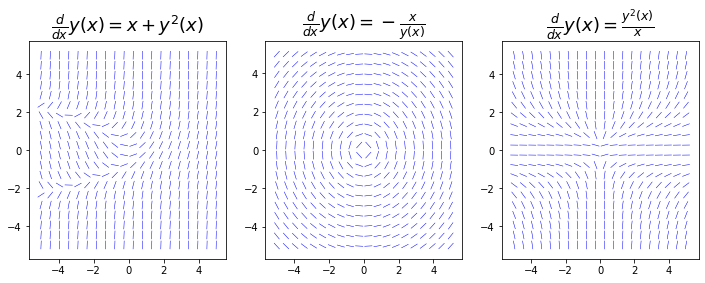

In [5]:
fig, axes = plt.subplots(1,3, figsize=(12,4))
plot_direction_field(x, y(x), y(x)**2 + x, ax=axes[0])
plot_direction_field(x, y(x), -x / y(x), ax=axes[1])
plot_direction_field(x, y(x), y(x)**2 / x, ax=axes[2])